## 필요한 모듈을 가져오고 데이터를 로드합니다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
# FinanceDataReader로 데이터를 불러옵니다
# 예측할 종목은 한양증권(001750) 입니다

import FinanceDataReader as fdr
STOCK_CODE = '001750'

In [3]:
# 기간은 10년으로 잡았습니다

df = fdr.DataReader(STOCK_CODE, '2010-12-31', '2020-12-31')

df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2011-01-03,9650,9700,9620,9650,17148,0.005208
2011-01-04,9680,9730,9680,9700,22315,0.005181
2011-01-05,9700,9750,9620,9630,17870,-0.007216
2011-01-06,9630,9690,9570,9580,37280,-0.005192
2011-01-07,9580,9650,9540,9610,75268,0.003132


In [4]:
# df.loc[:, "close"]를 하면 모든 row의 close를 인덱싱합니다
# 수익계산을 위해 조정된 종가만 유지하였습니다

df = df.loc[:, ['Close']]

# pandas DataFrame의 칼럼의 이름이 바뀐다

df.rename(columns={'Close':'adj_close'}, inplace=True)

## 종가를 사용하여 simple_rtn과 log_rtn을 계산합니다

In [5]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [6]:
df

,adj_close,simple_rtn,log_rtn
Date,,,
2011-01-03,9650,NaN,NaN
2011-01-04,9700,0.005181,0.005168
2011-01-05,9630,-0.007216,-0.007243
2011-01-06,9580,-0.005192,-0.005206
2011-01-07,9610,0.003132,0.003127
...,...,...,...
2020-12-23,9450,0.007463,0.007435
2020-12-24,9530,0.008466,0.008430
2020-12-28,9530,0.000000,0.000000


In [7]:
df['adj_close']

Date
2011-01-03    9650
2011-01-04    9700
2011-01-05    9630
2011-01-06    9580
2011-01-07    9610
              ... 
2020-12-23    9450
2020-12-24    9530
2020-12-28    9530
2020-12-29    9190
2020-12-30    9220
Name: adj_close, Length: 2463, dtype: int64

## Quandl에서 월간 소비자 물가지수(CPI_미국) 값을 다운로드합니다
> 지수의 변동률(단순 수익)과 인플레이션 데이터를 한양증권(001750)의 주식 수익률과 병합하여 인플레이션을 설명합니다 

In [8]:
# 라이브러리 가져오기 및 인증(Quandl)

import pandas as pd
import quandl

QUANDL_KEY = '69jU9SAxaugLG5dEfahJ' 
quandl.ApiConfig.api_key = QUANDL_KEY

In [9]:
df_all_dates = pd.DataFrame(index=pd.date_range(start='2010-12-31', 
                                                end='2020-12-31'))

df_all_dates

""
2010-12-31
2011-01-01
2011-01-02
2011-01-03
2011-01-04
...
2020-12-27
2020-12-28
2020-12-29
2020-12-30


In [10]:
# 가능한 모든 날짜로 DataFrame을 만들고 가격을 결합합니다

df = df_all_dates.join(df['adj_close'], how='left').fillna(method='ffill').asfreq('M')
df

,adj_close
2010-12-31,NaN
2011-01-31,9200.0
2011-02-28,8980.0
2011-03-31,8610.0
2011-04-30,8300.0
...,...
2020-08-31,8630.0
2020-09-30,8400.0
2020-10-31,8850.0
2020-11-30,9750.0


In [11]:
# Quandl에서 인플레이션 데이터를 다운로드 합니다

df_cpi = quandl.get(dataset='RATEINF/CPI_USA', 
                    start_date='2010-12-31', 
                    end_date='2020-12-31')
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)

df_cpi

,cpi
Date,
2010-12-31,219.179
2011-01-31,220.223
2011-02-28,221.309
2011-03-31,223.467
2011-04-30,224.906
...,...
2020-08-31,259.918
2020-09-30,260.280
2020-10-31,260.388


In [12]:
# 인플레이션 데이터를 가격에 병합합니다

df_merged = df.join(df_cpi, how='left')

df_merged

,adj_close,cpi
2010-12-31,NaN,219.179
2011-01-31,9200.0,220.223
2011-02-28,8980.0,221.309
2011-03-31,8610.0,223.467
2011-04-30,8300.0,224.906
...,...,...
2020-08-31,8630.0,259.918
2020-09-30,8400.0,260.280
2020-10-31,8850.0,260.388
2020-11-30,9750.0,260.229


In [13]:
# 단순 수익률과 인플레이션을 계산합니다

df_merged['simple_rtn'] = df_merged.adj_close.pct_change()
df_merged['inflation_rate'] = df_merged.cpi.pct_change()

df_merged

,adj_close,cpi,simple_rtn,inflation_rate
2010-12-31,NaN,219.179,NaN,NaN
2011-01-31,9200.0,220.223,NaN,0.004763
2011-02-28,8980.0,221.309,-0.023913,0.004931
2011-03-31,8610.0,223.467,-0.041203,0.009751
2011-04-30,8300.0,224.906,-0.036005,0.006439
...,...,...,...,...
2020-08-31,8630.0,259.918,0.044794,0.003153
2020-09-30,8400.0,260.280,-0.026651,0.001393
2020-10-31,8850.0,260.388,0.053571,0.000415
2020-11-30,9750.0,260.229,0.101695,-0.000611


In [14]:
df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate + 1) - 1

In [15]:
# 인플레이션에 대한 수익 조정
# 맨 오른쪽 열 real_rtn에는 인플레이션 조정 수익이 포함됩니다

df_merged

,adj_close,cpi,simple_rtn,inflation_rate,real_rtn
2010-12-31,NaN,219.179,NaN,NaN,NaN
2011-01-31,9200.0,220.223,NaN,0.004763,NaN
2011-02-28,8980.0,221.309,-0.023913,0.004931,-0.028703
2011-03-31,8610.0,223.467,-0.041203,0.009751,-0.050462
2011-04-30,8300.0,224.906,-0.036005,0.006439,-0.042173
...,...,...,...,...,...
2020-08-31,8630.0,259.918,0.044794,0.003153,0.041510
2020-09-30,8400.0,260.280,-0.026651,0.001393,-0.028005
2020-10-31,8850.0,260.388,0.053571,0.000415,0.053134
2020-11-30,9750.0,260.229,0.101695,-0.000611,0.102368


## 시각화합니다
> 인플레이션은 플러스 수익률을 낮추고 손실 규모를 증가시킵니다. Real_rtn은 시간 경과에 따른 투자 성과에 대한 인플레이션의 영향을 설명합니다. 또한 투자 실적에 대한 보다 현실적인 비교를 제공해주는 기준이 됩니다. 실질적으로 수익률을 낮추고 손실 규모를 증가시킵니다. Quandl에 연동되는 대한민국 데이터를 발견하지 못해서 USA 기준으로 Real_rtn을 계산하였습니다.

Text(0, 0.5, 'Real_rtn')

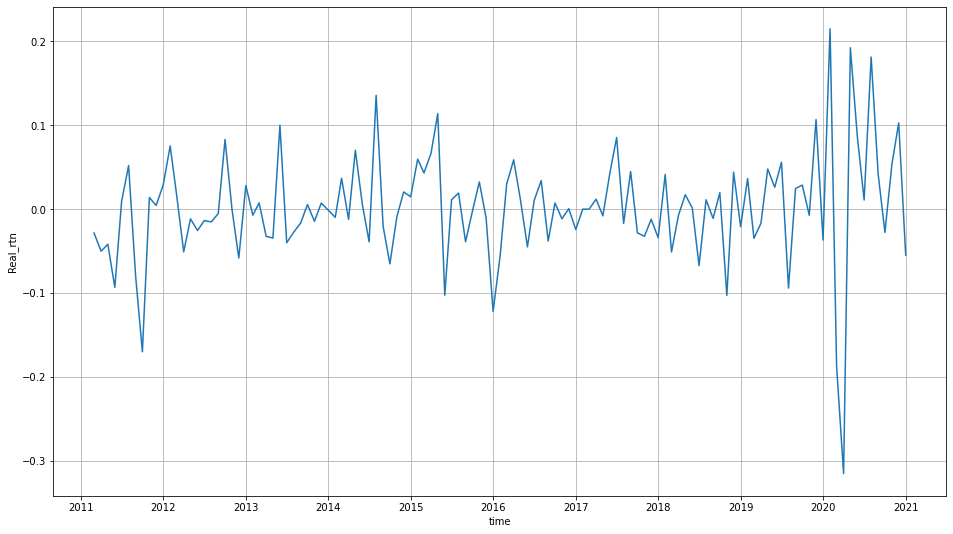

In [16]:
plt.figure(figsize=(16,9))
plt.grid(True)
sns.lineplot(y=df_merged['real_rtn'], x=df_merged.index)
plt.xlabel('time')
plt.ylabel('Real_rtn')